In [121]:
import matplotlib.pyplot as plt
import torch
import matplotlib.pyplot as plt

from serina import TestSet
import torchaudio.transforms as AT
import torchaudio
import torchvision.transforms as VT

In [122]:
SAMPLE_RATE = 44100

/Volumes/PData/AI/Conda/anaconda3/envs/serina/lib/python3.11/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


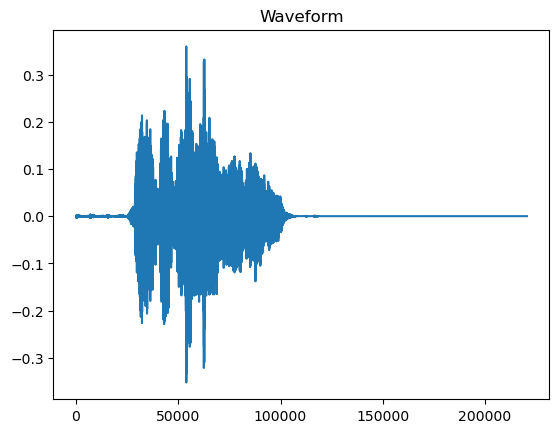

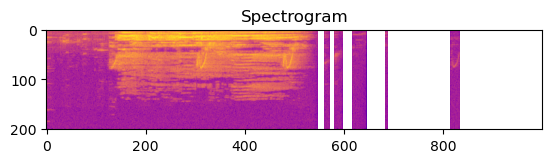

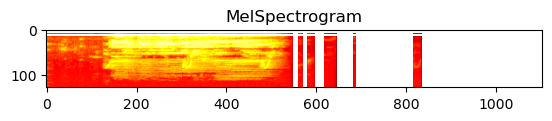

In [152]:
from serina import TrainSet

train_set = TrainSet()
raw_tensor, _, path, category = train_set.get_raw_info(900)

plt.figure()
plt.title("Waveform")
plt.plot(raw_tensor.t().numpy())

plt.figure()
plt.title("Spectrogram")
spec = AT.Spectrogram()(raw_tensor)
plt.imshow(spec.log2()[0,:,:1000].numpy(), cmap='plasma')

plt.figure()
plt.title("MelSpectrogram")
spec = AT.MelSpectrogram()(raw_tensor)
plt.imshow(spec.log2()[0,:,:].numpy(), cmap='hot')

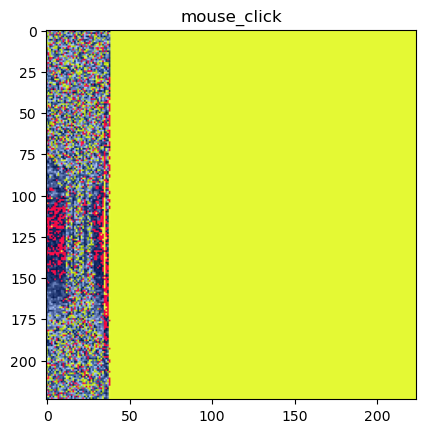

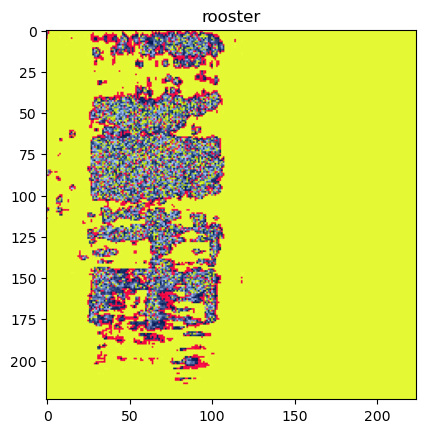

In [153]:
preprocess = VT.Compose([
    AT.MelSpectrogram(sample_rate=44100, f_max=18000, n_mels=224, n_fft=4096,
                      win_length=2205, hop_length=308),
    VT.ToPILImage(),
    VT.Lambda(lambda x: x.convert('RGB')),
    # VT.Resize((224, 224)),
    VT.Resize((224, 224)),
    VT.ToTensor(),  # 将图片转换为Tensor
    VT.Normalize(mean=[0.485, 0.456, 0.406],  # 图像标准化
                 std=[0.229, 0.224, 0.225]),
]
)

for i in [800,900]:
    raw_tensor, _, path, category = train_set.get_raw_info(i)
    p = VT.ToPILImage()(preprocess(raw_tensor))
    plt.figure()
    plt.title(category)
    plt.imshow(p)